In [1]:
# load libraries
suppressMessages(library(tidyverse))
suppressMessages(library(lmerTest))

In [284]:
# df_responses <- read.csv("zv_task_questionnaire_replication.csv")
df_responses <- read.csv("zv_task_questionnaire_replication.csv")

In [285]:
library(dplyr)

# # Check that df_responses exists and has data
# glimpse(df_responses)  # just to confirm

# Now filter the rows
df_experimental <- df_responses %>%
  filter(trialType == "experimental")

# Convert variables to factors
df_experimental <- df_experimental %>%
  mutate(
    trialIndex = as.factor(trialIndex),
    isMatch = as.factor(isMatch),
    subject = as.factor(subject),
    hit = as.factor(hit)
  )


In [286]:
#create sub dataset with experimental trials only
df_experimental <- filter(df_responses, trialType=="experimental")
df_experimental$trialIndex <- as.factor(df_experimental$trialIndex)
df_experimental$isMatch <- as.factor(df_experimental$isMatch)
df_experimental$subject <- as.factor(df_experimental$subject)
df_experimental$hit <- as.factor(df_experimental$hit)
# df_rt_correct <- subset(df_experimental, hit == 1)

#### RQ1: Do language comprehenders represent the implied shape of objects in sentences?
#### Specifically, are they slower when implied shape in a sentence does not match depicted shape in an image? 

In [287]:
model1_rt <- lmer(data=df_experimental,
                    rt_img ~ isMatch  + 
                      (1 | subject) +
                      (1 | trialIndex)
                    )

model1_hit <- glmer(data = df_experimental,
                    hit ~ isMatch + 
                      (1 | subject) +
                      (1 | trialIndex),
                    family = binomial)

summary(model1_rt)
summary(model1_hit)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt_img ~ isMatch + (1 | subject) + (1 | trialIndex)
   Data: df_experimental

REML criterion at convergence: 94439.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3822 -0.3987 -0.1354  0.1926 28.0366 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept) 115300   339.56  
 trialIndex (Intercept)   9991    99.95  
 Residual               221361   470.49  
Number of obs: 6205, groups:  subject, 111; trialIndex, 60

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   958.07      35.74  145.92  26.803  < 2e-16 ***
isMatchy      -68.40      11.96 6035.91  -5.721 1.11e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         (Intr)
isMatchy -0.169

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: hit ~ isMatch + (1 | subject) + (1 | trialIndex)
   Data: df_experimental

     AIC      BIC   logLik deviance df.resid 
  2120.8   2147.8  -1056.4   2112.8     6201 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-12.9992   0.0961   0.1365   0.1986   2.1155 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept) 1.656    1.287   
 trialIndex (Intercept) 1.031    1.016   
Number of obs: 6205, groups:  subject, 111; trialIndex, 60

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   3.5922     0.2160  16.630  < 2e-16 ***
isMatchy      0.4548     0.1305   3.487 0.000489 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         (Intr)
isMatchy -0.238

In [324]:
#### RQ2: Does self-reported vividness of visual imagery predict sentence-picture mismatch effect?
#### Specifically, does the mismatch effect increase as a function of the VVIQ scores? 

model2_rt <- lmer(data=df_experimental,
                    rt_img ~ isMatch * vviq_z+ 
                      (1 | subject) +
                      (1 | trialIndex))

# Accuracy model (full dataset)
model2_hit <- glmer(data = df_experimental,
                    hit ~ isMatch * vviq_z + 
                      (1 | subject) +
                      (1 | trialIndex),
                    family = binomial)

# Print summaries
cat("===== RT Model (Correct Trials Only) =====\n")
summary(model2_rt)

cat("\n===== Accuracy (Hit) Model =====\n")
summary(model2_hit)

===== RT Model (Correct Trials Only) =====


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt_img ~ isMatch * vviq_z + (1 | subject) + (1 | trialIndex)
   Data: df_experimental

REML criterion at convergence: 94418.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4381 -0.4000 -0.1357  0.1982 28.0233 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept) 114548   338.45  
 trialIndex (Intercept)   9968    99.84  
 Residual               221264   470.39  
Number of obs: 6205, groups:  subject, 111; trialIndex, 60

Fixed effects:
                Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)       958.28      35.64  144.81  26.884  < 2e-16 ***
isMatchy          -68.40      11.95 6034.93  -5.722  1.1e-08 ***
vviq_z             54.45      33.29  116.57   1.635   0.1047    
isMatchy:vviq_z   -23.14      11.96 6038.94  -1.935   0.0531 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Eff


===== Accuracy (Hit) Model =====


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: hit ~ isMatch * vviq_z + (1 | subject) + (1 | trialIndex)
   Data: df_experimental

     AIC      BIC   logLik deviance df.resid 
  2123.1   2163.5  -1055.5   2111.1     6199 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-12.9150   0.0953   0.1361   0.1987   2.2647 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept) 1.658    1.288   
 trialIndex (Intercept) 1.035    1.017   
Number of obs: 6205, groups:  subject, 111; trialIndex, 60

Fixed effects:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      3.59400    0.21639  16.609  < 2e-16 ***
isMatchy         0.46114    0.13095   3.522 0.000429 ***
vviq_z           0.08817    0.15711   0.561 0.574676    
isMatchy:vviq_z -0.17448    0.13316  -1.310 0.190097    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlati

In [327]:
# library(emmeans)

# emtr <- emtrends(model2_rt, pairwise ~ isMatch, var = "vviq_z", 
#                  lmerTest.limit = 6205, pbkrtest.limit = 6205)
# summary(emtr)

# # Plot marginal predicted trends
# emmip(model2_rt, isMatch ~ vviq_z, cov.reduce = range) +
#   xlab("VVIQ (z)") +
#   ylab("Predicted Image RT (ms)") +
#   theme_minimal(base_size = 14)

# # Estimate and compare slopes
# emt <- emtrends(model2_rt, ~ isMatch, var = "vviq_z")
# pairs(emt)

,isMatch,vviq_z.trend,SE,df,lower.CL,upper.CL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,n,54.44521,33.29214,116.3737,-11.49184,120.38226
2,y,31.30035,33.28739,116.3096,-34.62767,97.22836
,contrast,estimate,SE,df,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,n - y,23.14486,11.96335,6039.261,1.934648,0.05308016


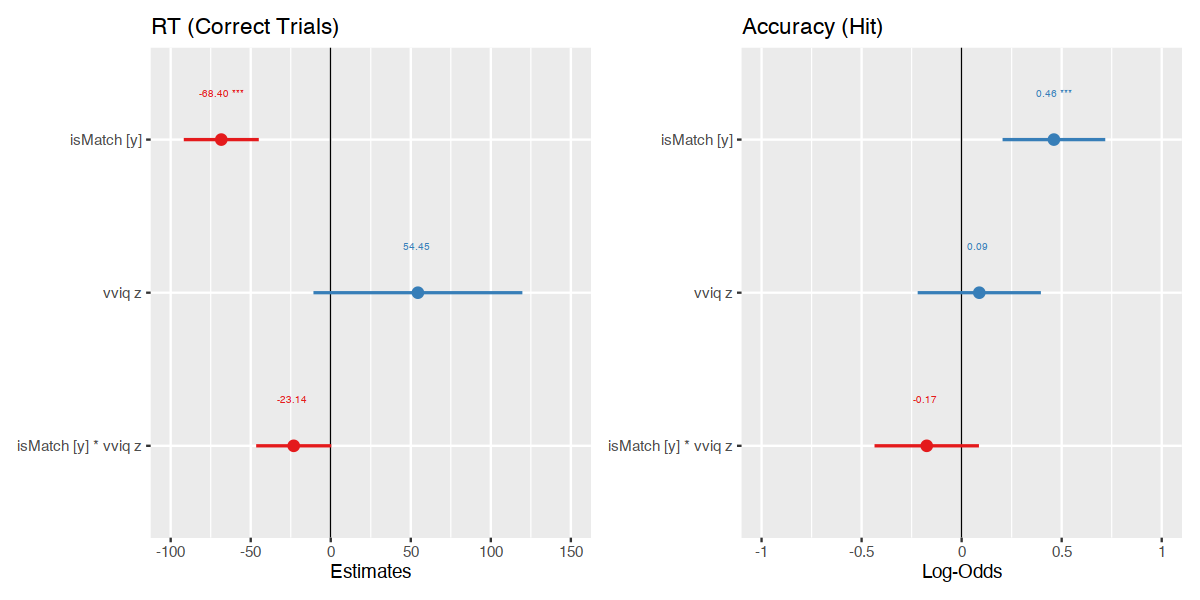

In [289]:
library(sjPlot)
library(patchwork)  # for combining plots

# Plot each model individually
p_rt <- plot_model(model2_rt,
                   type = "est", transform = NULL,
                   title = "RT (Correct Trials)",
                   show.values = TRUE, value.offset = 0.3,
                   vline.color = "black", ci.lvl = 0.95,
                   axis.labels.size = 14,
                   title.size = 14,
                   value.size = 2)

p_hit <- plot_model(model2_hit,
                    type = "est", transform = NULL,
                    title = "Accuracy (Hit)",
                    show.values = TRUE, value.offset = 0.3,
                    vline.color = "black", ci.lvl = 0.95,
                    axis.labels.size = 24,
                    title.size = 18,
                    value.size = 2)


# Combine plots horizontally
combined_plot <- p_rt + p_hit + plot_layout(nrow = 1)


options(repr.plot.width = 10, repr.plot.height = 5)


# Display the combined plot
combined_plot

Data were 'prettified'. Consider using `terms="vviq_z [all]"` to get
  smooth plots.



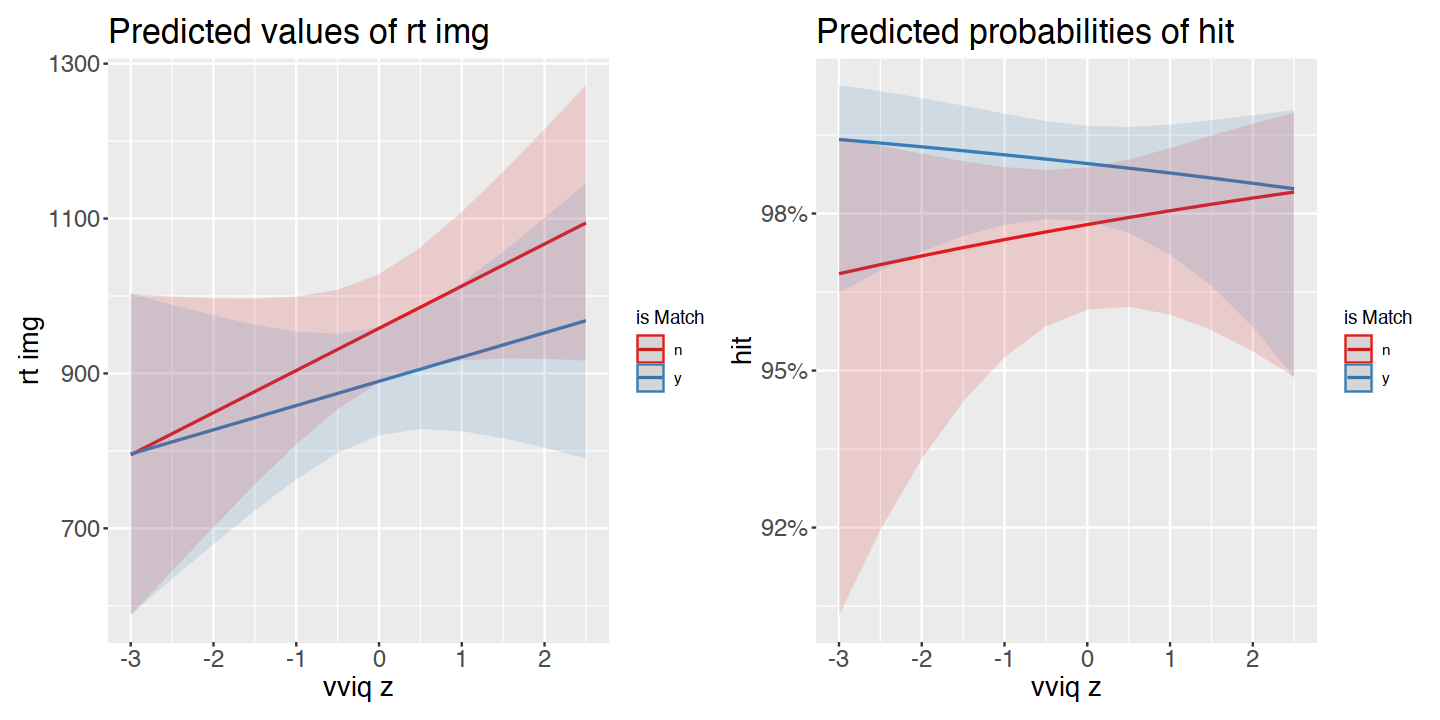

In [290]:
library(sjPlot)
library(patchwork)

# Plot predicted values
p_rt_pred <- plot_model(model2_rt, type = "pred", terms = c("vviq_z", "isMatch"))
p_hit_pred <- plot_model(model2_hit, type = "pred", terms = c("vviq_z", "isMatch"))

# Optional: Add custom themes
theme_big_text <- theme(
  plot.title = element_text(size = 20),
  axis.title = element_text(size = 16),
  axis.text = element_text(size = 14)
)

p_rt_pred <- p_rt_pred + theme_big_text
p_hit_pred <- p_hit_pred + theme_big_text

# Combine predicted plots horizontally
combined_pred_plot <- p_rt_pred + p_hit_pred + plot_layout(nrow = 1)

options(repr.plot.width = 12, repr.plot.height = 6)


# Show
combined_pred_plot


In [291]:
picture_rt <- lmer(data=df_experimental,
                    rt_sent ~ irq_verbal_z + 
                      (1 | subject) +
                      (1 | trialIndex)
                 )

summary(picture_rt)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt_sent ~ irq_verbal_z + (1 | subject) + (1 | trialIndex)
   Data: df_experimental

REML criterion at convergence: 117183.3

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.118 -0.134 -0.083  0.004 34.109 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept)  347258   589.29 
 trialIndex (Intercept)    9815    99.07 
 Residual               9154397  3025.62 
Number of obs: 6205, groups:  subject, 111; trialIndex, 60

Fixed effects:
             Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   1104.20      69.12   94.95  15.974   <2e-16 ***
irq_verbal_z  -119.20      68.08  109.73  -1.751   0.0828 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
irq_verbl_z 0.002 

In [292]:
#### RQ1: Does self-reported vividness of visual imagery predict sentence-picture mismatch effect?
#### Specifically, does the mismatch effect increase as a function of the VVIQ scores? 

model2_rt <- lmer(data=df_experimental,
                    rt_img ~ isMatch * (irq_visual_z + irq_verbal_z) + 
                      (1 | subject) +
                      (1 | trialIndex)
                 )

# Accuracy model (full dataset)
model2_hit <- glmer(data = df_experimental,
                    hit ~ isMatch * (irq_visual_z + irq_verbal_z) + 
                      (1 | subject) +
                      (1 | trialIndex),
                    family = binomial)

# Print summaries
cat("===== RT Model (Correct Trials Only) =====\n")
summary(model2_rt)

cat("\n===== Accuracy (Hit) Model =====\n")
summary(model2_hit)

===== RT Model (Correct Trials Only) =====


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt_img ~ isMatch * (irq_visual_z + irq_verbal_z) + (1 | subject) +  
    (1 | trialIndex)
   Data: df_experimental

REML criterion at convergence: 94402.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3925 -0.4024 -0.1363  0.1939 28.0150 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept) 115447   339.8   
 trialIndex (Intercept)  10064   100.3   
 Residual               221294   470.4   
Number of obs: 6205, groups:  subject, 111; trialIndex, 60

Fixed effects:
                       Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)            958.3000    35.7808  143.5413  26.783  < 2e-16 ***
isMatchy               -68.3469    11.9549 6033.9054  -5.717 1.14e-08 ***
irq_visual_z            50.4351    37.6921  115.6098   1.338   0.1835    
irq_verbal_z             0.8499    37.6801  115.6940   0.023   0.9820    
isMatchy:irq_visua


===== Accuracy (Hit) Model =====


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: hit ~ isMatch * (irq_visual_z + irq_verbal_z) + (1 | subject) +  
    (1 | trialIndex)
   Data: df_experimental

     AIC      BIC   logLik deviance df.resid 
  2117.3   2171.1  -1050.6   2101.3     6197 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-12.8309   0.0947   0.1356   0.1987   2.5328 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept) 1.580    1.257   
 trialIndex (Intercept) 1.035    1.018   
Number of obs: 6205, groups:  subject, 111; trialIndex, 60

Fixed effects:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)            3.62888    0.21592  16.806   <2e-16 ***
isMatchy               0.40769    0.13257   3.075   0.0021 ** 
irq_visual_z           0.42108    0.17289   2.436   0.0149 *  
irq_verbal_z           0.04770    0.18006   0.265   0.7911    
isMatchy:irq_visua

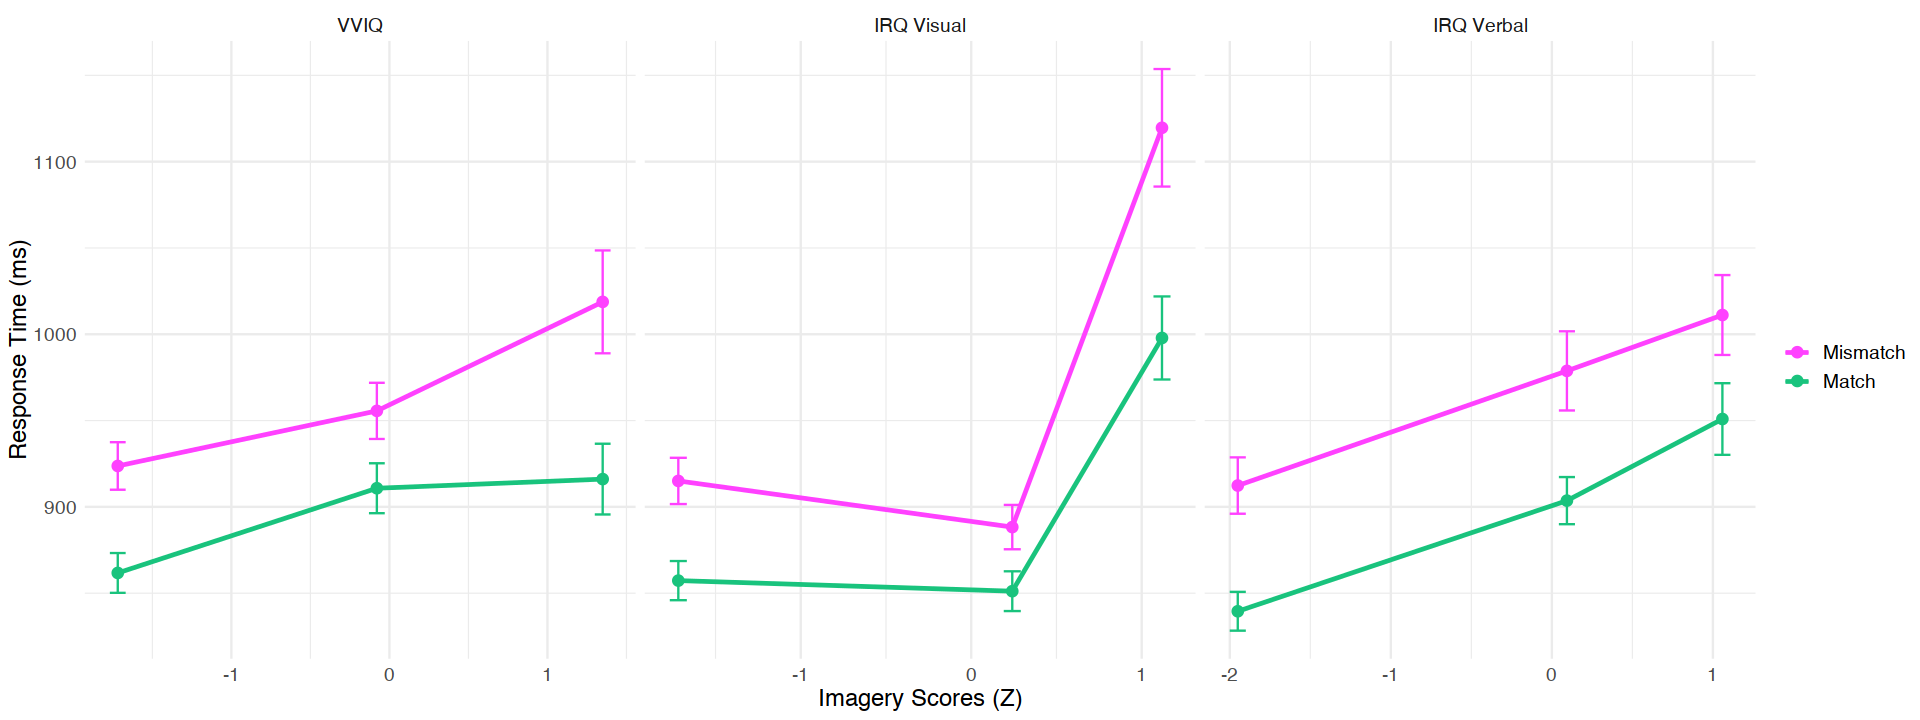

In [294]:
library(dplyr)
library(ggplot2)
library(forcats)
library(stringr)

# Base dataframe
df <- df_experimental %>%
  mutate(isMatch = recode(isMatch, "n" = "Mismatch", "y" = "Match"))

# ----- VVIQ RT -----
summary_vviq <- df %>%
  mutate(bin = cut_number(vviq_z, n = 3)) %>%
  group_by(bin, isMatch) %>%
  summarise(
    mean_rt = mean(rt_img, na.rm = TRUE),
    count_rt = n(),
    sd_rt = sd(rt_img, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(
    se_rt = sd_rt / sqrt(count_rt),
    ci68 = se_rt * qt(0.84, df = count_rt - 1),
    bin_mid = bin %>%
      as.character() %>%
      str_extract_all("-?\\d+\\.*\\d*") %>%
      sapply(function(x) mean(as.numeric(x))),
    dimension = "VVIQ"
  )

# ----- IRQ Visual RT -----
summary_visual <- df %>%
  mutate(bin = cut_number(irq_visual_z, n = 3)) %>%
  group_by(bin, isMatch) %>%
  summarise(
    mean_rt = mean(rt_img, na.rm = TRUE),
    count_rt = n(),
    sd_rt = sd(rt_img, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(
    se_rt = sd_rt / sqrt(count_rt),
    ci68 = se_rt * qt(0.84, df = count_rt - 1),
    bin_mid = bin %>%
      as.character() %>%
      str_extract_all("-?\\d+\\.*\\d*") %>%
      sapply(function(x) mean(as.numeric(x))),
    dimension = "IRQ Visual"
  )

# ----- IRQ Verbal RT -----
summary_verbal <- df %>%
  mutate(bin = cut_number(irq_verbal_z, n = 3)) %>%
  group_by(bin, isMatch) %>%
  summarise(
    mean_rt = mean(rt_img, na.rm = TRUE),
    count_rt = n(),
    sd_rt = sd(rt_img, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(
    se_rt = sd_rt / sqrt(count_rt),
    ci68 = se_rt * qt(0.84, df = count_rt - 1),
    bin_mid = bin %>%
      as.character() %>%
      str_extract_all("-?\\d+\\.*\\d*") %>%
      sapply(function(x) mean(as.numeric(x))),
    dimension = "IRQ Verbal"
  )

# ----- Combine & Order -----
summary_combined <- bind_rows(summary_vviq, summary_visual, summary_verbal) %>%
  mutate(dimension = factor(dimension, levels = c("VVIQ", "IRQ Visual", "IRQ Verbal")))

# ----- Plot -----
color_map <- c("Mismatch" = "#ff41ff", "Match" = "#19c37d")

options(repr.plot.width = 16, repr.plot.height = 6)

ggplot(summary_combined, aes(x = bin_mid, y = mean_rt, color = isMatch)) +
  geom_point(size = 2.5) +
  geom_errorbar(aes(ymin = mean_rt - ci68, ymax = mean_rt + ci68), width = 0.1) +
  geom_line(linewidth = 1) +
  scale_color_manual(values = color_map) +
  facet_wrap(~dimension, scales = "free_x", nrow = 1) +
  labs(x = "Imagery Scores (Z)", y = "Response Time (ms)", color = "") +
  theme_minimal() +
  theme(
    text = element_text(size = 14),
    legend.position = "right"
  )

In [295]:
library(dplyr)

# Set threshold (top 2.5% of sentence RTs)
upper_cutoff <- quantile(df_experimental$rt_sent, 0.975, na.rm = TRUE)

# Filter out unusually long RTs
df_clean <- df_experimental %>%
  filter(rt_sent <= upper_cutoff)


In [296]:
df_clean <- df_clean %>%
  mutate(rt_sent_z = scale(rt_sent)[, 1])  # scale returns a matrix

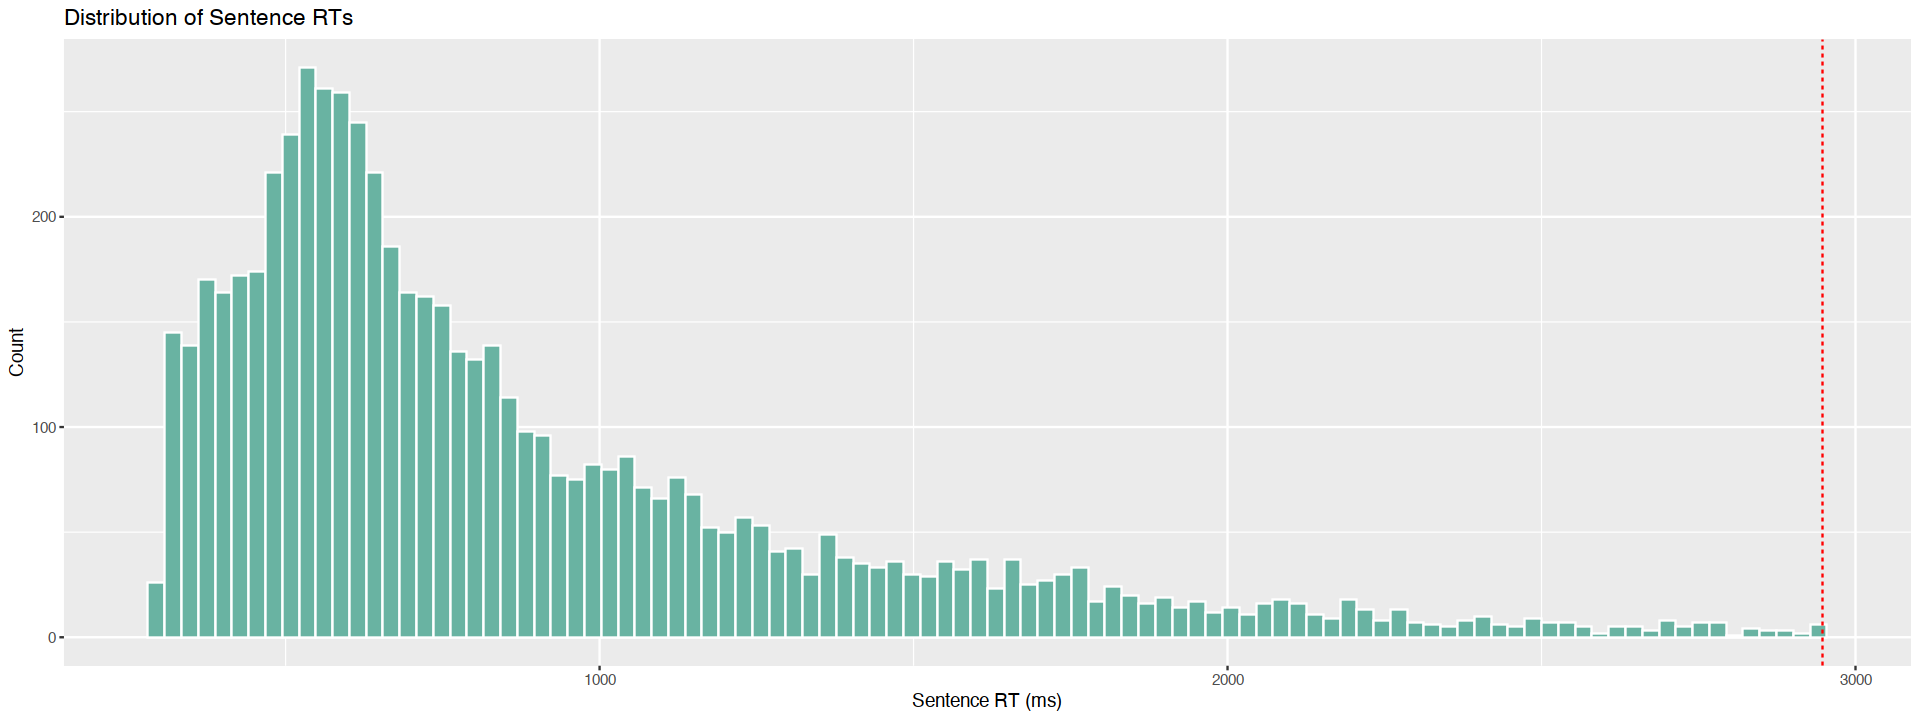

In [297]:
library(ggplot2)

ggplot(df_clean, aes(x = rt_sent)) +
  geom_histogram(bins = 100, fill = "#69b3a2", color = "white") +
  geom_vline(xintercept = upper_cutoff, color = "red", linetype = "dashed") +
  labs(title = "Distribution of Sentence RTs",
       x = "Sentence RT (ms)",
       y = "Count")


In [322]:
model_sent_rt <- lmer(data = df_clean,
                      rt_sent ~ vviq_z +
                      (1 | subject) +
                      (1 | trialIndex))
summary(model_sent_rt)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt_sent ~ vviq_z + (1 | subject) + (1 | trialIndex)
   Data: df_clean

REML criterion at convergence: 90187.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9584 -0.5795 -0.2633  0.2721  5.7285 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept)  89400   299.00  
 trialIndex (Intercept)   2649    51.47  
 Residual               162758   403.43  
Number of obs: 6050, groups:  subject, 111; trialIndex, 60

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  865.974     29.612 119.151  29.244   <2e-16 ***
vviq_z         4.579     28.911 108.781   0.158    0.874    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
       (Intr)
vviq_z 0.006 

In [316]:
#### D' model to be corrected!!!

# d′ model (full dataset or adjust as needed)
model_compl_rt <- lmer(data = df_clean,
                      rt_img ~ isMatch * vviq_z * rt_sent_z +
                      (1 | subject) +
                      (1 | trialIndex))



cat("\n===== d′ Model =====\n")
summary(model_compl_rt)


===== d′ Model =====


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt_img ~ isMatch * vviq_z * rt_sent_z + (1 | subject) + (1 |  
    trialIndex)
   Data: df_clean

REML criterion at convergence: 91555.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2578 -0.3957 -0.1217  0.1963 29.0854 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept) 101071   317.92  
 trialIndex (Intercept)   9087    95.33  
 Residual               204502   452.22  
Number of obs: 6050, groups:  subject, 111; trialIndex, 60

Fixed effects:
                          Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                955.423     33.629  144.930  28.410  < 2e-16 ***
isMatchy                   -72.617     11.645 5876.029  -6.236  4.8e-10 ***
vviq_z                      53.712     31.340  116.149   1.714 0.089221 .  
rt_sent_z                   87.675      9.568 6003.960   9.163  < 2e-16 ***
isMatchy:vviq_z           

In [319]:
# #### D' model to be corrected!!!

# # d′ model (full dataset or adjust as needed)
# model_compl_acc <- glmer(data = df_clean,
#                       hit ~ isMatch * vviq_z * rt_sent_z +
#                       (1 | subject) +
#                       (1 | trialIndex),
#                        family=binomial)



# cat("\n===== d′ Model =====\n")
# summary(model_compl_acc)

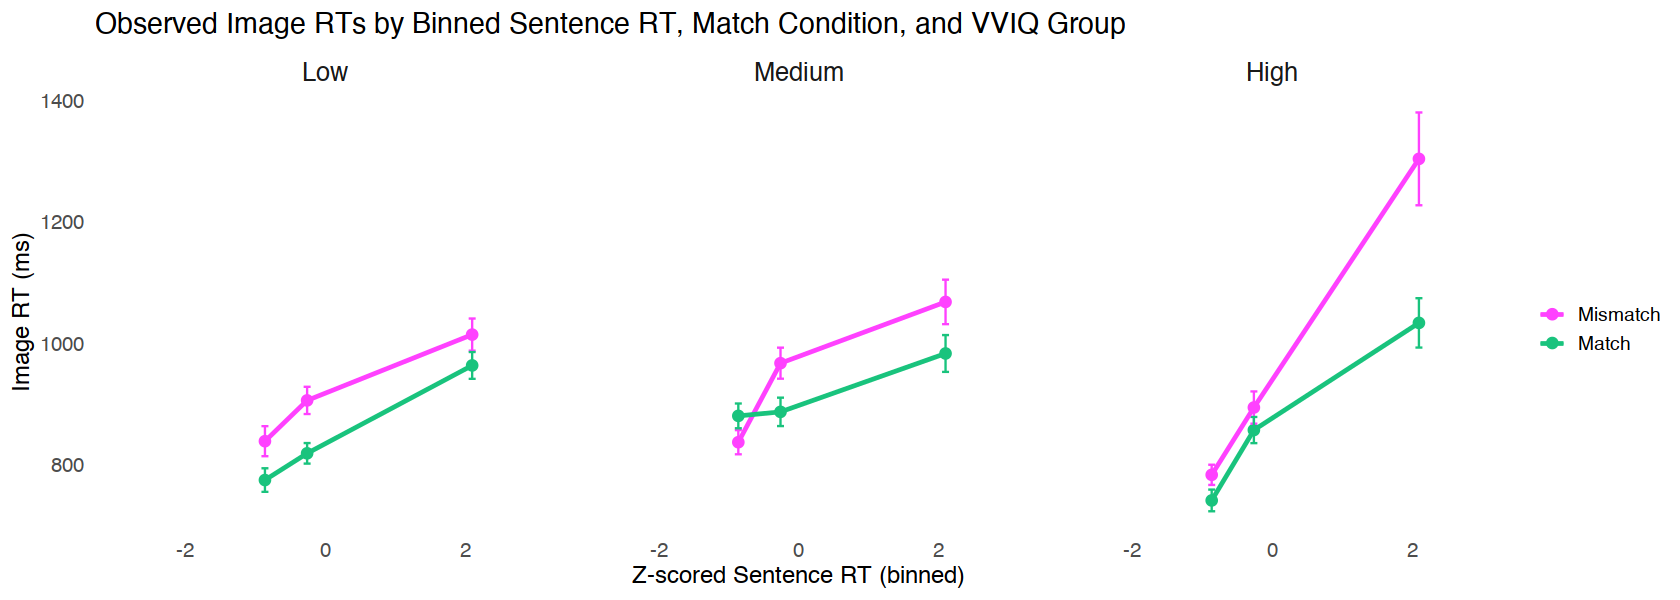

In [314]:
library(dplyr)
library(ggplot2)
library(forcats)
library(stringr)

# Adjust plot size (change these values as needed)
options(repr.plot.width = 14, repr.plot.height = 5)

# Step 0: Prep base df
df <- df_clean %>%
  mutate(
    isMatch = recode(isMatch, "n" = "Mismatch", "y" = "Match"),
    vviq_group = ntile(vviq_z, 3),
    vviq_group = factor(vviq_group, labels = c("Low", "Medium", "High"))
  )

# Step 1: Bin rt_sent_z into 3 quantiles
df <- df %>%
  mutate(bin = cut_number(rt_sent_z, n = 3))

# Step 2: Summarize
summary_plot <- df %>%
  group_by(bin, isMatch, vviq_group) %>%
  summarise(
    mean_rt = mean(rt_img, na.rm = TRUE),
    count = n(),
    sd_rt = sd(rt_img, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(
    se_rt = sd_rt / sqrt(count),
    ci68 = se_rt * qt(0.84, df = count - 1),
    bin_mid = bin %>%
      as.character() %>%
      str_extract_all("-?\\d+\\.*\\d*") %>%
      sapply(function(x) mean(as.numeric(x)))
  )

# Step 3: Plot
ggplot(summary_plot, aes(x = bin_mid, y = mean_rt, color = isMatch)) +
  geom_point(size = 2.5) +
  geom_errorbar(aes(ymin = mean_rt - ci68, ymax = mean_rt + ci68), width = 0.1) +
  geom_line(linewidth = 1) +
  scale_color_manual(values = c("Mismatch" = "#ff41ff", "Match" = "#19c37d")) +
  facet_wrap(~vviq_group, scales = "free_x", nrow = 1) +
  labs(
    x = "Z-scored Sentence RT (binned)",
    y = "Image RT (ms)",
    color = "",
    title = "Observed Image RTs by Binned Sentence RT, Match Condition, and VVIQ Group"
  ) +
  xlim(-3, 3) +  # Force x-axis range
  theme_minimal(base_size = 14) +
  theme(
    panel.grid = element_blank(),
    legend.position = "right",
    strip.text = element_text(size = 15),
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 14)
  )


In [269]:
df_match <- df_experimental %>% filter(isMatch == "y")
df_mismatch <- df_experimental %>% filter(isMatch == "n")

In [317]:
# Model 1: For Match trials
model_match <- lmer(rt_img ~ vviq_z * rt_sent_z + 
                    (1 | subject) + (1 | trialIndex),
                    data = df_match)

cat("\n===== Match Trials Model =====\n")
summary(model_match)

# Model 2: For Mismatch trials
model_mismatch <- lmer(rt_img ~ vviq_z * rt_sent_z + 
                       (1 | subject) + (1 | trialIndex),
                       data = df_mismatch)

cat("\n===== Mismatch Trials Model =====\n")
summary(model_mismatch)


===== Match Trials Model =====


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt_img ~ vviq_z * rt_sent_z + (1 | subject) + (1 | trialIndex)
   Data: df_match

REML criterion at convergence: 46559.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1744 -0.4348 -0.1524  0.2248 17.7898 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept)  92318   303.84  
 trialIndex (Intercept)   6222    78.88  
 Residual               155450   394.27  
Number of obs: 3124, groups:  subject, 111; trialIndex, 60

Fixed effects:
                 Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)       890.555     31.396  128.549  28.366   <2e-16 ***
vviq_z             29.758     29.773  108.835   0.999   0.3198    
rt_sent_z          21.898      6.931 3014.410   3.159   0.0016 ** 
vviq_z:rt_sent_z  -11.606     19.095 3015.508  -0.608   0.5434    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixe


===== Mismatch Trials Model =====


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt_img ~ vviq_z * rt_sent_z + (1 | subject) + (1 | trialIndex)
   Data: df_mismatch

REML criterion at convergence: 47764.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0340 -0.3735 -0.1240  0.1765 23.9377 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept) 132941   364.6   
 trialIndex (Intercept)  16682   129.2   
 Residual               283839   532.8   
Number of obs: 3081, groups:  subject, 111; trialIndex, 60

Fixed effects:
                 Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)        958.88      39.62  139.39  24.204   <2e-16 ***
vviq_z              57.03      36.04  108.39   1.582   0.1165    
rt_sent_z           24.17      11.54 2975.67   2.095   0.0363 *  
vviq_z:rt_sent_z    41.49      27.55 2974.08   1.506   0.1322    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed 